In [17]:
# imports
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("S&P_data.csv")

df['Date']=pd.to_datetime(df['Date'].astype(str), format='%m/%d/%Y')
df = df.sort_values(by = "Date", ascending = True)

df.head()

,Date,Close/Last,Volume,Open,High,Low
2544,2012-12-20,1443.69,--,1435.81,1443.70,1432.82
2543,2012-12-21,1430.15,--,1443.67,1443.67,1422.58
2542,2012-12-24,1426.66,--,1430.15,1430.15,1424.66
2541,2012-12-25,1426.66,--,0.00,0.00,0.00
2540,2012-12-26,1419.83,--,1426.66,1429.42,1416.43


In [3]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
4,2022-12-13,4019.65,--,4069.38,4100.96,3993.03
3,2022-12-14,3995.32,--,4015.54,4053.76,3965.65
2,2022-12-15,3895.75,--,3958.37,3958.37,3879.45
1,2022-12-16,3852.36,--,3890.91,3890.91,3827.91
0,2022-12-19,3817.66,--,3853.79,3854.86,3800.04


## Plot of S&P 500 Close Value

Text(0, 0.5, 'Close/Last')

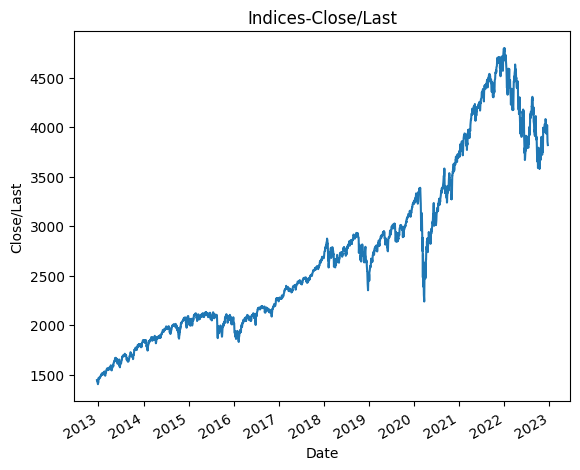

In [4]:
# Plotting the time series of given dataframe
plt.plot(df.Date, df['Close/Last'])
 
# Giving title to the chart using plt.title
plt.title('Indices-Close/Last')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Close/Last')


# Data Preprocessing

In [5]:
# count any NAN values
df.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

We are going to train the model on Close/Last index value

In [6]:
# 
data = df[['Close/Last']]
data

,Close/Last
2544,1443.69
2543,1430.15
2542,1426.66
2541,1426.66
2540,1419.83
...,...
4,4019.65
3,3995.32
2,3895.75
1,3852.36


## Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

## Preparing Training and Test Datasets

In [8]:
data = data.astype('float32')

train_size = int(len(data) * 0.7)
test_size = len(data) - train_size

train = data[0:train_size,:]
test = data[train_size:len(data),:]

train = data[0:train_size,:]
test = data[train_size:len(data),:]

print("Shape of training vector", train.shape)
print("Shape of test vector", test.shape)

Shape of training vector (1781, 1)
Shape of test vector (764, 1)


In [9]:
def generate_sequence(data, lookback=10):
    """
    Function to generate sequence of data by using lookback as step size
    """
    X, Y = [], []
    for i in range(len(data)-lookback-1):
        X.append(data[i:(i+lookback),0])
        Y.append(data[i + lookback,0])
    return np.array(X), np.array(Y)

In [10]:
lookback = 10

X_train, Y_train = generate_sequence(train, lookback)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

print("Shape of X_train", X_train.shape)
print("Shape of Y_train", Y_train.shape)

X_test, Y_test = generate_sequence(test, lookback)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print("Shape of X_train", X_test.shape)
print("Shape of Y_test", Y_test.shape)

Shape of X_train (1770, 1, 10)
Shape of Y_train (1770,)
Shape of X_train (753, 1, 10)
Shape of Y_test (753,)


# Model Training

## Model Definition

In [16]:
INPUT_NODES = 8

lstm_model = Sequential()
lstm_model.add(LSTM(INPUT_NODES, input_shape=(1, lookback)))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(1))
lstm_model.compile(loss="mse", optimizer="adam")

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 8)                 608       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________


In [12]:
lstm_model.fit(X_train, Y_train, epochs=40, batch_size=64, verbose=1)

Epoch 1/40
 1/28 [>.............................] - ETA: 40s - loss: 0.1064

2022-12-20 18:49:55.133751: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


28/28 [==============================] - 2s 2ms/step - loss: 0.0633
Epoch 2/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0233
Epoch 3/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 4/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 5/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 6/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 7/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 8/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 9/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 10/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 11/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 12/40
28/28 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 13/40
28/28 [==============================] - 0s 2ms/

In [13]:
train_preds = lstm_model.predict(X_train)
test_preds = lstm_model.predict(X_test)

24/24 [==============================] - 0s 960us/step


In [14]:
# inverse transform scaled data

data = scaler.inverse_transform(data)
train_preds = scaler.inverse_transform(train_preds)
test_preds = scaler.inverse_transform(test_preds)

<function matplotlib.pyplot.show(close=None, block=None)>

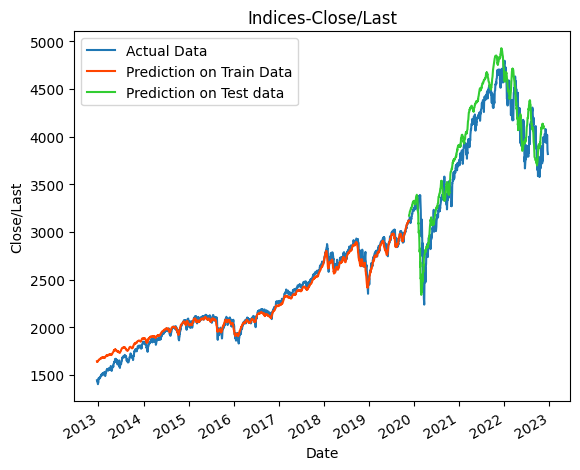

In [15]:
# Plotting the time series of given dataframe
idx = len(train_preds)
train_dates = df.iloc[0:idx,:].Date
test_dates = df.iloc[idx:idx+len(test_preds),:].Date

plt.plot(df.Date, data, label='Actual Data')

plt.plot(train_dates, train_preds, 'orangered', label='Prediction on Train Data')
plt.plot(test_dates, test_preds, 'limegreen', label='Prediction on Test data')

# plt.plot(df.iloc[:len(test_preds)].Date, test_preds, 'g-', label='Test Prediction')
 
# Giving title to the chart using plt.title
plt.title('Indices-Close/Last')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Close/Last')

plt.legend()
plt.show